# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\Aniket\AppliedAI\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [2]:
# import csv files
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')


# merge two csv into one on 'id' and with 'left join'
whole_data = project_data.merge(resource_data, on='id', how='left')

# take 30000 samples
data = whole_data.sample(50000)

In [3]:
print("Number of data points in data", data.shape)
print('-'*50)
print("The attributes of data :", data.columns.values)

Number of data points in data (50000, 20)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'description' 'quantity' 'price']


## 2.2 Data Cleaning 

In [4]:
# categories
catogories = list(data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [5]:
data['clean_categories'] = cat_list
data.drop(['project_subject_categories'], axis=1, inplace=True)

In [6]:
# sub_catogories
sub_catogories = list(data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [7]:
data['clean_subcategories'] = sub_cat_list
data.drop(['project_subject_subcategories'], axis=1, inplace=True)

In [8]:
# project_grade
grades = list(data['project_grade_category'].values)

grade_list = []
for i in grades:
    temp = ""
    
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'Grades' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('Grades ','grades_') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" "
        temp = temp.replace('-','_') #" abc ".strip() will return "abc", remove the trailing spaces
    grade_list.append(temp.strip())

In [9]:
data['clean_grades'] = grade_list
data.drop(['project_grade_category'], axis=1, inplace=True)

In [10]:
# merge four project_essay columns into one column essay
data["essay"] = data["project_essay_1"].map(str) +\
                data["project_essay_2"].map(str) + \
                data["project_essay_3"].map(str) + \
                data["project_essay_4"].map(str)

In [11]:
data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
649186      177617  p000980  43c2b2cfd5a22586070a2ec9d76fa795            Ms.   
229085      150003  p199253  bb05d7faf1dd6835a679f7080c01f4ee            Ms.   
136212      127194  p233865  dbb1006014653efce2c85fc5a4d71cdf            Ms.   
406855      171674  p011617  749371140498394cdd5d7c6c77656b2b           Mrs.   
425090       13865  p209375  d9686fd7fce80b958eb3446f459ba2e5           Mrs.   

       school_state project_submitted_datetime  \
649186           IN        2016-10-05 21:29:07   
229085           CT        2016-08-23 17:13:56   
136212           NY        2016-08-22 18:29:33   
406855           MA        2016-08-26 20:27:18   
425090           NY        2016-10-01 15:13:24   

                                            project_title  \
649186                           Awesome Audio Adventures   
229085           Art Supplies for MD Fox Student Artists!   
136212  Topographers Know Where It's At: Making 3D Lan...   
406855                        Sing-Along Songs That Teach   
425090                             Future Problem Solvers   

                                          project_essay_1  \
649186  My students come from a low-income area.  Many...   
229085  are amazing. Many of my students are new arriv...   
136212  My students often begin the year thinking they...   
406855  For most of my students kindergarten is their ...   
425090  I have a mixture of lively active youngsters w...   

                                          project_essay_2 project_essay_3  \
649186  A book is an adventure you hold in your hands....             NaN   
229085  These art supplies will be used by all of the ...             NaN   
136212  Students will be working in groups to create s...             NaN   
406855  The Sing-Along Songs series by Heidi Songs use...             NaN   
425090  In today's classrooms students are not being e...             NaN   

        ...                           project_resource_summary  \
649186  ...  My students need sets of books and CD's for th...   
229085  ...  My students need these basic supplies to make ...   
136212  ...  My students need supplies to construct and pai...   
406855  ...  My students need Sing-Along Songs that teach i...   
425090  ...  My students need materials that encourage expl...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
649186                                            1                    1   
229085                                            1                    1   
136212                                            0                    1   
406855                                            1                    1   
425090                                           12                    1   

                                              description quantity  price  \
649186                                    Alice The Fairy        3  13.13   
229085   20103-6009:  Crayola Crayons - Box of 12, Purple        5   1.63   
136212  Elmer's Foam Board, White Surface with White C...       10  15.65   
406855                 Music for Classroom Management DVD        1  15.00   
425090         PP799 - Block Play STEM Early Learning Kit        1  79.50   

                    clean_categories                   clean_subcategories  \
649186             Literacy_Language                              Literacy   
229085                    Music_Arts                            VisualArts   
136212                  Math_Science  AppliedSciences EnvironmentalScience   
406855  Literacy_Language Music_Arts                             ESL Music   
425090                  Math_Science           AppliedSciences Mathematics   

         clean_grades                                              essay  
649186  grades_PreK_2  My students come from a low-income area.  Many...  
229085     grades_3_5  are amazing. Many of my students are new arriv...  
136212    grades_9

## 2.3 Text Preprocessing

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [14]:
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [00:55<00:00, 896.48it/s]


In [15]:
data['preprocessed_essays'] = preprocessed_essays
data.drop(['essay'], axis=1, inplace=True)

In [16]:
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 19746.91it/s]


In [17]:
data['preprocessed_project_title'] = preprocessed_project_title
data.drop(['project_title'], axis=1, inplace=True)

In [18]:
y = data['project_is_approved'].values
data.drop(['project_is_approved'], axis=1, inplace=True)

In [19]:
X = data

In [76]:
# train, cv and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>2.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [21]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_cv_clean_categories_ohe.shape, y_cv.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [22]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [23]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [24]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix_ohe = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
X_cv_teacher_prefix_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
X_test_teacher_prefix_ohe = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))

print("After vectorizations")
print(X_train_teacher_prefix_ohe.shape, y_train.shape)
print(X_cv_teacher_prefix_ohe.shape, y_cv.shape)
print(X_test_teacher_prefix_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 6) (22445,)
(11055, 6) (11055,)
(16500, 6) (16500,)
['dr', 'mr', 'mrs', 'ms', 'nan', 'teacher']


In [25]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_grades'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grades_ohe = vectorizer.transform(X_train['clean_grades'].values)
X_cv_grades_ohe = vectorizer.transform(X_cv['clean_grades'].values)
X_test_grades_ohe = vectorizer.transform(X_test['clean_grades'].values)

print("After vectorizations")
print(X_train_grades_ohe.shape, y_train.shape)
print(X_cv_grades_ohe.shape, y_cv.shape)
print(X_test_grades_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [26]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [27]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_prev_proj_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_prev_proj_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_prev_proj_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_prev_proj_norm.shape, y_train.shape)
print(X_cv_prev_proj_norm.shape, y_cv.shape)
print(X_test_prev_proj_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<h2>2.5 Make Data Model Ready: encoding eassay, and project_title</h2>

#### BOW

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_preprocessed_essays_bow = vectorizer.transform(X_train['preprocessed_essays'].values)
X_cv_preprocessed_essays_bow = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_preprocessed_essays_bow = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_preprocessed_essays_bow.shape, y_train.shape)
print(X_cv_preprocessed_essays_bow.shape, y_cv.shape)
print(X_test_preprocessed_essays_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 78524) (22445,)
(11055, 78524) (11055,)
(16500, 78524) (16500,)


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(X_train['preprocessed_project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_preprocessed_project_title_bow = vectorizer.transform(X_train['preprocessed_project_title'].values)
X_cv_preprocessed_project_title_bow = vectorizer.transform(X_cv['preprocessed_project_title'].values)
X_test_preprocessed_project_title_bow = vectorizer.transform(X_test['preprocessed_project_title'].values)

print("After vectorizations")
print(X_train_preprocessed_project_title_bow.shape, y_train.shape)
print(X_cv_preprocessed_project_title_bow.shape, y_cv.shape)
print(X_test_preprocessed_project_title_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 2160) (22445,)
(11055, 2160) (11055,)
(16500, 2160) (16500,)


### Concatinating all features

In [31]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_bow = hstack((X_train_preprocessed_essays_bow, X_train_preprocessed_project_title_bow, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_state_ohe, X_train_teacher_prefix_ohe, X_train_grades_ohe, X_train_price_norm, X_train_prev_proj_norm)).tocsr()
X_cr_bow = hstack((X_cv_preprocessed_essays_bow, X_cv_preprocessed_project_title_bow, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_state_ohe, X_cv_teacher_prefix_ohe, X_cv_grades_ohe, X_cv_price_norm, X_cv_prev_proj_norm)).tocsr()
X_te_bow = hstack((X_test_preprocessed_essays_bow, X_test_preprocessed_project_title_bow, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_state_ohe, X_test_teacher_prefix_ohe, X_test_grades_ohe, X_test_price_norm, X_test_prev_proj_norm)).tocsr()

print("Final Data matrix")
print(X_tr_bow.shape, y_train.shape)
print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 80786) (22445,)
(11055, 80786) (11055,)
(16500, 80786) (16500,)


### Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [81]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

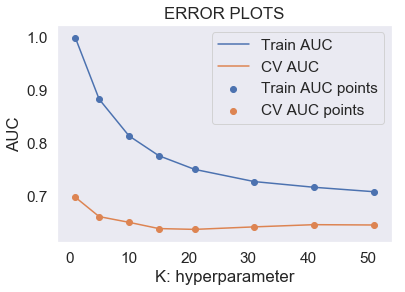

In [109]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr_bow, y_train)

    y_train_pred = batch_predict(neigh, X_tr_bow)    
    y_cv_pred = batch_predict(neigh, X_cr_bow)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

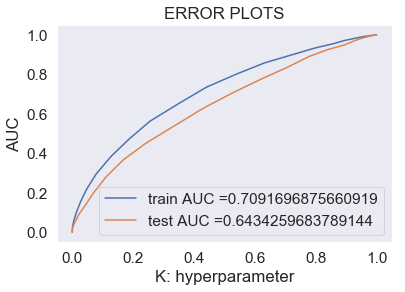

In [111]:
from sklearn.metrics import roc_curve, auc

neigh = KNeighborsClassifier(n_neighbors=51)
neigh.fit(X_tr_bow, y_train)

y_train_pred = batch_predict(neigh, X_tr_bow)    
y_test_pred = batch_predict(neigh, X_te_bow)

tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Accuracy on test set: 79.01818181818182
Precision on test set: 0.7927916921197312
Recall on test set: 0.9946351931330472
F1-Score on test set: 0.8823169488068529


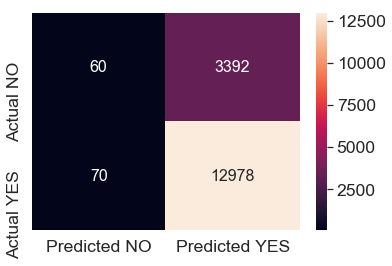

In [33]:
# confusion matrix plot: https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=51)
neigh.fit(X_tr_bow, y_train)
y_Predicted = neigh.predict(X_te_bow)
print("Accuracy on test set: {}".format(accuracy_score(y_test, y_Predicted)*100))
print("Precision on test set: {}".format(precision_score(y_test, y_Predicted)))
print("Recall on test set: {}".format(recall_score(y_test, y_Predicted)))
print("F1-Score on test set: {}".format(f1_score(y_test, y_Predicted)))

df = pd.DataFrame(confusion_matrix(y_test, y_Predicted), range(2),range(2))
df.columns = ['Predicted NO','Predicted YES']
df = df.rename({0: 'Actual NO', 1: 'Actual YES'})

sns.set(font_scale=1.6)
sns.heatmap(df, annot=True, annot_kws={"size": 16}, fmt='g')

#### TFIDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_preprocessed_essays_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
X_cv_preprocessed_essays_tfidf = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_preprocessed_essays_tfidf = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_preprocessed_essays_tfidf.shape, y_train.shape)
print(X_cv_preprocessed_essays_tfidf.shape, y_cv.shape)
print(X_test_preprocessed_essays_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 79405) (22445,)
(11055, 79405) (11055,)
(16500, 79405) (16500,)


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(X_train['preprocessed_project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_preprocessed_project_title_tfidf = vectorizer.transform(X_train['preprocessed_project_title'].values)
X_cv_preprocessed_project_title_tfidf = vectorizer.transform(X_cv['preprocessed_project_title'].values)
X_test_preprocessed_project_title_tfidf = vectorizer.transform(X_test['preprocessed_project_title'].values)

print("After vectorizations")
print(X_train_preprocessed_project_title_tfidf.shape, y_train.shape)
print(X_cv_preprocessed_project_title_tfidf.shape, y_cv.shape)
print(X_test_preprocessed_project_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 2170) (22445,)
(11055, 2170) (11055,)
(16500, 2170) (16500,)


### Concatinating all features

In [77]:
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_preprocessed_essays_tfidf, X_train_preprocessed_project_title_tfidf, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_state_ohe, X_train_teacher_prefix_ohe, X_train_grades_ohe, X_train_price_norm, X_train_prev_proj_norm)).tocsr()
X_cr_tfidf = hstack((X_cv_preprocessed_essays_tfidf, X_cv_preprocessed_project_title_tfidf, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_state_ohe, X_cv_teacher_prefix_ohe, X_cv_grades_ohe, X_cv_price_norm, X_cv_prev_proj_norm)).tocsr()
X_te_tfidf = hstack((X_test_preprocessed_essays_tfidf, X_test_preprocessed_project_title_tfidf, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_state_ohe, X_test_teacher_prefix_ohe, X_test_grades_ohe, X_test_price_norm, X_test_prev_proj_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 81677) (22445,)
(11055, 81677) (11055,)
(16500, 81677) (16500,)


### Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

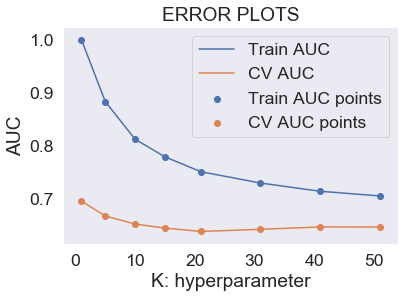

In [116]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr_tfidf, y_train)

    y_train_pred = batch_predict(neigh, X_tr_tfidf)    
    y_cv_pred = batch_predict(neigh, X_cr_tfidf)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

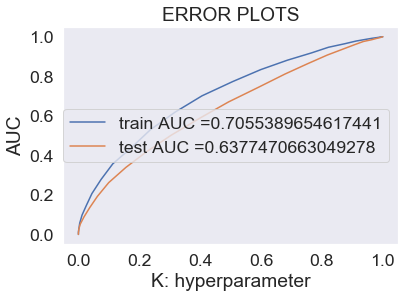

In [117]:
from sklearn.metrics import roc_curve,auc

neigh = KNeighborsClassifier(n_neighbors=51)
neigh.fit(X_tr_tfidf, y_train)

y_train_pred = batch_predict(neigh, X_tr_tfidf)    
y_test_pred = batch_predict(neigh, X_te_tfidf)

tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Accuracy on test set: 78.95151515151515
Precision on test set: 0.792580822587545
Recall on test set: 0.9939454322501533
F1-Score on test set: 0.8819149297881745


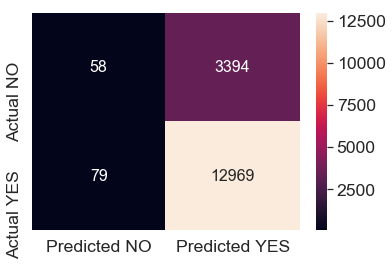

In [37]:
# confusion matrix plot: https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=51)
neigh.fit(X_tr_tfidf, y_train)
y_Predicted = neigh.predict(X_te_tfidf)
print("Accuracy on test set: {}".format(accuracy_score(y_test, y_Predicted)*100))
print("Precision on test set: {}".format(precision_score(y_test, y_Predicted)))
print("Recall on test set: {}".format(recall_score(y_test, y_Predicted)))
print("F1-Score on test set: {}".format(f1_score(y_test, y_Predicted)))

df = pd.DataFrame(confusion_matrix(y_test, y_Predicted), range(2),range(2))
df.columns = ['Predicted NO','Predicted YES']
df = df.rename({0: 'Actual NO', 1: 'Actual YES'})

sns.set(font_scale=1.6)
sns.heatmap(df, annot=True, annot_kws={"size": 16}, fmt='g')

#### AVG-W2V

In [30]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [32]:
# average Word2Vec
# compute average word2vec for each review.
X_train_avg_w2v_vectors_preprocessed_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_w2v_vectors_preprocessed_essays.append(vector)

print(len(X_train_avg_w2v_vectors_preprocessed_essays))
print(len(X_train_avg_w2v_vectors_preprocessed_essays[0]))

X_cv_avg_w2v_vectors_preprocessed_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_avg_w2v_vectors_preprocessed_essays.append(vector)

print(len(X_cv_avg_w2v_vectors_preprocessed_essays))
print(len(X_cv_avg_w2v_vectors_preprocessed_essays[0]))

X_test_avg_w2v_vectors_preprocessed_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_vectors_preprocessed_essays.append(vector)

print(len(X_test_avg_w2v_vectors_preprocessed_essays))
print(len(X_test_avg_w2v_vectors_preprocessed_essays[0]))

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:16<00:00, 1350.48it/s]


22445
300


100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:07<00:00, 1461.63it/s]


11055
300


100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:11<00:00, 1472.54it/s]


16500
300


In [33]:
# average Word2Vec
# compute average word2vec for each review.
X_train_avg_w2v_vectors_preprocessed_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_w2v_vectors_preprocessed_project_title.append(vector)

print(len(X_train_avg_w2v_vectors_preprocessed_project_title))
print(len(X_train_avg_w2v_vectors_preprocessed_project_title[0]))

X_cv_avg_w2v_vectors_preprocessed_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_avg_w2v_vectors_preprocessed_project_title.append(vector)

print(len(X_cv_avg_w2v_vectors_preprocessed_project_title))
print(len(X_cv_avg_w2v_vectors_preprocessed_project_title[0]))

X_test_avg_w2v_vectors_preprocessed_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_vectors_preprocessed_project_title.append(vector)

print(len(X_test_avg_w2v_vectors_preprocessed_project_title))
print(len(X_test_avg_w2v_vectors_preprocessed_project_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 25377.27it/s]


22445
300


100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 23428.44it/s]


11055
300


100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 23755.69it/s]


16500
300


### Concatinating all features

In [34]:
from scipy.sparse import hstack
X_tr_avg_w2v = hstack((X_train_avg_w2v_vectors_preprocessed_essays, X_train_avg_w2v_vectors_preprocessed_project_title, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_state_ohe, X_train_teacher_prefix_ohe, X_train_grades_ohe, X_train_price_norm, X_train_prev_proj_norm)).tocsr()
X_cr_avg_w2v = hstack((X_cv_avg_w2v_vectors_preprocessed_essays, X_cv_avg_w2v_vectors_preprocessed_project_title, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_state_ohe, X_cv_teacher_prefix_ohe, X_cv_grades_ohe, X_cv_price_norm, X_cv_prev_proj_norm)).tocsr()
X_te_avg_w2v = hstack((X_test_avg_w2v_vectors_preprocessed_essays, X_test_avg_w2v_vectors_preprocessed_project_title, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_state_ohe, X_test_teacher_prefix_ohe, X_test_grades_ohe, X_test_price_norm, X_test_prev_proj_norm)).tocsr()

print("Final Data matrix")
print(X_tr_avg_w2v.shape, y_train.shape)
print(X_cr_avg_w2v.shape, y_cv.shape)
print(X_te_avg_w2v.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 701) (22445,)
(11055, 701) (11055,)
(16500, 701) (16500,)


### Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

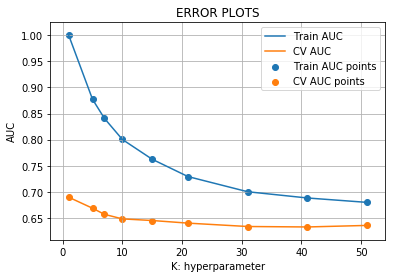

In [37]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 7, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr_avg_w2v, y_train)

    y_train_pred = batch_predict(neigh, X_tr_avg_w2v)    
    y_cv_pred = batch_predict(neigh, X_cr_avg_w2v)


    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

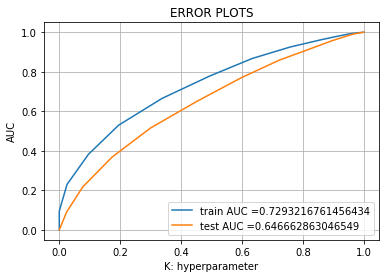

In [38]:
from sklearn.metrics import roc_curve,auc

neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(X_tr_avg_w2v, y_train)

y_train_pred = batch_predict(neigh, X_tr_avg_w2v)    
y_test_pred = batch_predict(neigh, X_te_avg_w2v)

tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Accuracy on test set: 79.18787878787879
Precision on test set: 0.7962245588144868
Recall on test set: 0.9908179661795088
F1-Score on test set: 0.8829264966589391
Confusion Matrix of test set:


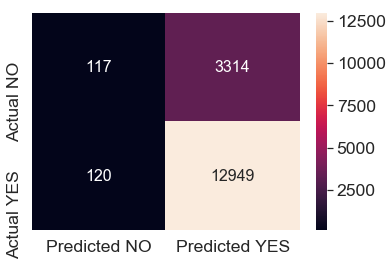

In [39]:
# confusion matrix plot: https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(X_tr_avg_w2v, y_train)
y_Predicted = neigh.predict(X_te_avg_w2v)
print("Accuracy on test set: {}".format(accuracy_score(y_test, y_Predicted)*100))
print("Precision on test set: {}".format(precision_score(y_test, y_Predicted)))
print("Recall on test set: {}".format(recall_score(y_test, y_Predicted)))
print("F1-Score on test set: {}".format(f1_score(y_test, y_Predicted)))
print("Confusion Matrix of test set:")

df = pd.DataFrame(confusion_matrix(y_test, y_Predicted), range(2),range(2))
df.columns = ['Predicted NO','Predicted YES']
df = df.rename({0: 'Actual NO', 1: 'Actual YES'})

sns.set(font_scale=1.6)
sns.heatmap(df, annot=True, annot_kws={"size": 16}, fmt='g')

#### TFIDF W2V

In [28]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [31]:
# average Word2Vec
# compute average word2vec for each review.
X_train_tfidf_w2v_vectors_preprocessed_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_vectors_preprocessed_essays.append(vector)

print(len(X_train_tfidf_w2v_vectors_preprocessed_essays))
print(len(X_train_tfidf_w2v_vectors_preprocessed_essays[0]))


# average Word2Vec
# compute average word2vec for each review.
X_cv_tfidf_w2v_vectors_preprocessed_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_w2v_vectors_preprocessed_essays.append(vector)

print(len(X_cv_tfidf_w2v_vectors_preprocessed_essays))
print(len(X_cv_tfidf_w2v_vectors_preprocessed_essays[0]))


# average Word2Vec
# compute average word2vec for each review.
X_test_tfidf_w2v_vectors_preprocessed_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_vectors_preprocessed_essays.append(vector)

print(len(X_test_tfidf_w2v_vectors_preprocessed_essays))
print(len(X_test_tfidf_w2v_vectors_preprocessed_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [01:48<00:00, 206.47it/s]


22445
300


100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:54<00:00, 160.87it/s]


11055
300


100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [01:21<00:00, 201.92it/s]


16500
300


In [32]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [33]:
# average Word2Vec
# compute average word2vec for each review.
X_train_tfidf_w2v_vectors_preprocessed_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_vectors_preprocessed_project_title.append(vector)

print(len(X_train_tfidf_w2v_vectors_preprocessed_project_title))
print(len(X_train_tfidf_w2v_vectors_preprocessed_project_title[0]))


# average Word2Vec
# compute average word2vec for each review.
X_cv_tfidf_w2v_vectors_preprocessed_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_w2v_vectors_preprocessed_project_title.append(vector)

print(len(X_cv_tfidf_w2v_vectors_preprocessed_project_title))
print(len(X_cv_tfidf_w2v_vectors_preprocessed_project_title[0]))


# average Word2Vec
# compute average word2vec for each review.
X_test_tfidf_w2v_vectors_preprocessed_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_vectors_preprocessed_project_title.append(vector)

print(len(X_test_tfidf_w2v_vectors_preprocessed_project_title))
print(len(X_test_tfidf_w2v_vectors_preprocessed_project_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:02<00:00, 10931.45it/s]


22445
300


100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 11427.56it/s]


11055
300


100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:01<00:00, 11178.23it/s]


16500
300


### Concatinating all features

In [35]:
X_tr_tfidf_w2v = hstack((X_train_tfidf_w2v_vectors_preprocessed_essays, X_train_tfidf_w2v_vectors_preprocessed_project_title, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_state_ohe, X_train_teacher_prefix_ohe, X_train_grades_ohe, X_train_price_norm, X_train_prev_proj_norm)).tocsr()
X_cr_tfidf_w2v = hstack((X_cv_tfidf_w2v_vectors_preprocessed_essays, X_cv_tfidf_w2v_vectors_preprocessed_project_title, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_state_ohe, X_cv_teacher_prefix_ohe, X_cv_grades_ohe, X_cv_price_norm, X_cv_prev_proj_norm)).tocsr()
X_te_tfidf_w2v = hstack((X_test_tfidf_w2v_vectors_preprocessed_essays, X_test_tfidf_w2v_vectors_preprocessed_project_title, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_state_ohe, X_test_teacher_prefix_ohe, X_test_grades_ohe, X_test_price_norm, X_test_prev_proj_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf_w2v.shape, y_train.shape)
print(X_cr_tfidf_w2v.shape, y_cv.shape)
print(X_te_tfidf_w2v.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 702) (22445,)
(11055, 702) (11055,)
(16500, 702) (16500,)


### Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

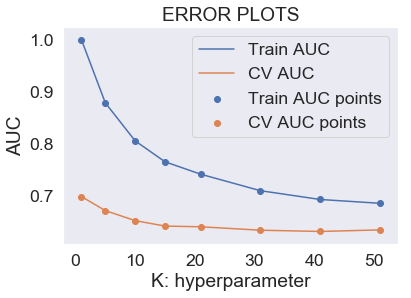

In [46]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr_tfidf_w2v, y_train)

    y_train_pred = batch_predict(neigh, X_tr_tfidf_w2v)    
    y_cv_pred = batch_predict(neigh, X_cr_tfidf_w2v)


    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

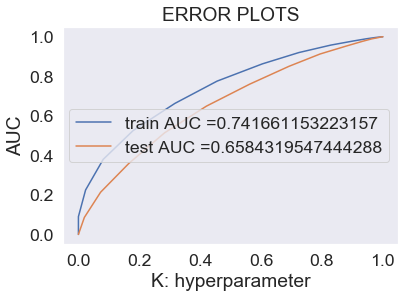

In [47]:
from sklearn.metrics import roc_curve,auc

neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(X_tr_tfidf_w2v, y_train)

y_train_pred = batch_predict(neigh, X_tr_tfidf_w2v)    
y_test_pred = batch_predict(neigh, X_te_tfidf_w2v)

tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Accuracy on test set: 79.41818181818182
Precision on test set: 0.7965428780845346
Recall on test set: 0.9950404394933619
F1-Score on test set: 0.8847954406676165
Confusion Matrix of test set:


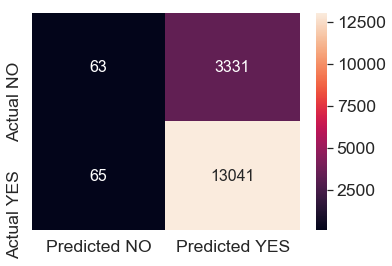

In [36]:
# confusion matrix plot: https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=31)
neigh.fit(X_tr_tfidf_w2v, y_train)
y_Predicted = neigh.predict(X_te_tfidf_w2v)
print("Accuracy on test set: {}".format(accuracy_score(y_test, y_Predicted)*100))
print("Precision on test set: {}".format(precision_score(y_test, y_Predicted)))
print("Recall on test set: {}".format(recall_score(y_test, y_Predicted)))
print("F1-Score on test set: {}".format(f1_score(y_test, y_Predicted)))
print("Confusion Matrix of test set:")

df = pd.DataFrame(confusion_matrix(y_test, y_Predicted), range(2),range(2))
df.columns = ['Predicted NO','Predicted YES']
df = df.rename({0: 'Actual NO', 1: 'Actual YES'})

sns.set(font_scale=1.6)
sns.heatmap(df, annot=True, annot_kws={"size": 16}, fmt='g')

<h2>2.5 Feature selection with `SelectKBest` on <font color='red'> SET 2</font> </h2> 

In [79]:
from sklearn.feature_selection import SelectKBest, chi2

selecter = SelectKBest(chi2, k=2000).fit(X_tr_tfidf,y_train)
X_tr = selecter.transform(X_tr_tfidf)
X_cr = selecter.transform(X_cr_tfidf)
X_te = selecter.transform(X_te_tfidf)

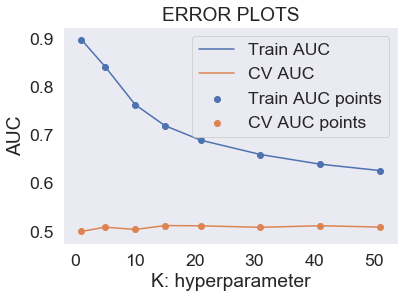

In [82]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)


    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

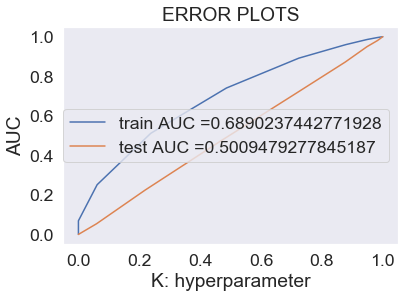

In [87]:
from sklearn.metrics import roc_curve,auc

neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(X_tr, y_train)

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
te_fpr, te_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(tr_fpr, tr_tpr, label="train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Accuracy on test set: 79.43030303030302
Precision on test set: 0.7943030303030303
Recall on test set: 1.0
F1-Score on test set: 0.8853610754576775
Confusion Matrix of test set:


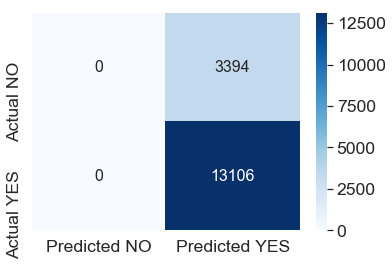

In [96]:
# confusion matrix plot: https://www.kaggle.com/agungor2/various-confusion-matrix-plots
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(X_tr, y_train)
y_Predicted = neigh.predict(X_te)
print("Accuracy on test set: {}".format(accuracy_score(y_test, y_Predicted)*100))
print("Precision on test set: {}".format(precision_score(y_test, y_Predicted)))
print("Recall on test set: {}".format(recall_score(y_test, y_Predicted)))
print("F1-Score on test set: {}".format(f1_score(y_test, y_Predicted)))
print("Confusion Matrix of test set:")

df = pd.DataFrame(confusion_matrix(y_test, y_Predicted))
df.columns = ['Predicted NO','Predicted YES']
df = df.rename({0: 'Actual NO', 1: 'Actual YES'})
sns.set(font_scale=1.6) #for label-size
sns.heatmap(df, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g')# https://datatofish.com/confusion-matrix-python/

<h1>3. Conclusions</h1>

In [90]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper parameter", "AUC"]

x.add_row(["BOW", "Brute", 51, 0.64])
x.add_row(["TFIDF", "Brute", 51, 0.63])
x.add_row(["AVGW2V", "Brute", 21, 0.64])
x.add_row(["TFIDFW2V", "Brute", 21, 0.65])
x.add_row(["TFIDF WITH 2000 FEATURES", "Brute", 21, 0.50])

In [91]:
print(x)

+--------------------------+-------+-----------------+------+
|        Vectorizer        | Model | Hyper parameter | AUC  |
+--------------------------+-------+-----------------+------+
|           BOW            | Brute |        51       | 0.64 |
|          TFIDF           | Brute |        51       | 0.63 |
|          AVGW2V          | Brute |        21       | 0.64 |
|         TFIDFW2V         | Brute |        21       | 0.65 |
| TFIDF WITH 2000 FEATURES | Brute |        21       | 0.5  |
+--------------------------+-------+-----------------+------+
